# Capstone EDA
----

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

import json

In [2]:
lol = pd.read_csv("./data/matches/match_df.csv")

In [3]:
lol.head()

match_id  game_duration game_mode     game_type   game_version  \
0  NA1_4201994783           1470   CLASSIC  MATCHED_GAME  12.2.419.1399   
1  NA1_4204324706            944   CLASSIC  MATCHED_GAME  12.3.421.3734   
2  NA1_4215791943           1629   CLASSIC  MATCHED_GAME  12.3.421.5967   
3  NA1_4200912084           1329   CLASSIC  MATCHED_GAME  12.2.419.1399   
4  NA1_4218373259           1718   CLASSIC  MATCHED_GAME  12.3.421.5967   

   t1p1_assists  t1p1_baronKills  t1p1_bountyLevel  t1p1_champExperience  \
0             7                0                 0                  8396   
1             2                0                 0                  7015   
2             5                1                 4                 14510   
3             4                0                 0                 10220   
4             3                0                 0                 14922   

   t1p1_champLevel  ...  t2_champion_kills t2_dragon_first  t2_dragon_kills  \
0               11  ...                 47               0                1   
1               10  ...                 17               1                1   
2               15  ...                 27               1                3   
3               13  ...                 34               1                2   
4               16  ...                 24               1                4   

   t2_inhibitor_first  t2_inhibitor_kills  t2_riftHerald_first  \
0                   1                   2                    1   
1                   0                   0                    0   
2                   0                   0                    0   
3                   1                   1                    0   
4                   1                   2                    0   

   t2_riftHerald_kills  t2_tower_first  t2_tower_kills  t1_win  
0                    1               1              10       0  
1                    0               0               2       0  
2                    0               1               2       1  
3                    1               1               9       0  
4                    0               0              10       0  

[5 rows x 1150 columns]

In [4]:
lol.describe()

game_duration  t1p1_assists  t1p1_baronKills  t1p1_bountyLevel  \
count   1.756500e+04  17565.000000     17565.000000      17565.000000   
mean    3.062098e+03      5.356277         0.027498          0.936635   
std     5.007124e+04      4.292500         0.167999          1.851564   
min     1.910000e+02      0.000000         0.000000          0.000000   
25%     1.337000e+03      2.000000         0.000000          0.000000   
50%     1.571000e+03      4.000000         0.000000          0.000000   
75%     1.827000e+03      8.000000         0.000000          1.000000   
max     2.121672e+06     43.000000         2.000000         21.000000   

       t1p1_champExperience  t1p1_champLevel  t1p1_championId  \
count          17565.000000     17565.000000     17565.000000   
mean           12934.795218        14.209564       180.612069   
std             3866.302369         2.391146       239.843041   
min                0.000000         1.000000         1.000000   
25%            10303.000000        13.000000        54.000000   
50%            12822.000000        14.000000        98.000000   
75%            15452.000000        16.000000       164.000000   
max            31318.000000        18.000000       888.000000   

       t1p1_championTransform  t1p1_consumablesPurchased  \
count            17565.000000               17565.000000   
mean                 0.001423                   3.370168   
std                  0.048294                   2.512904   
min                  0.000000                   0.000000   
25%                  0.000000                   2.000000   
50%                  0.000000                   3.000000   
75%                  0.000000                   5.000000   
max                  2.000000                  84.000000   

       t1p1_damageDealtToBuildings  ...  t2_champion_kills  t2_dragon_first  \
count                 17565.000000  ...       17565.000000     17565.000000   
mean                   3914.249189  ...          25.866382         0.565386   
std                    3582.115595  ...          11.205004         0.495720   
min                       0.000000  ...           0.000000         0.000000   
25%                    1167.000000  ...          18.000000         0.000000   
50%                    3025.000000  ...          26.000000         1.000000   
75%                    5689.000000  ...          34.000000         1.000000   
max                   26409.000000  ...          74.000000         1.000000   

       t2_dragon_kills  t2_inhibitor_first  t2_inhibitor_kills  \
count     17565.000000        17565.000000        17565.000000   
mean          1.930259            0.410589            0.744720   
std           1.302503            0.491955            0.988816   
min           0.000000            0.000000            0.000000   
25%           1.000000            0.000000            0.000000   
50%           2.000000            0.000000            0.000000   
75%           3.000000            1.000000            1.000000   
max           7.000000            1.000000           11.000000   

       t2_riftHerald_first  t2_riftHerald_kills  t2_tower_first  \
count         17565.000000         17565.000000    17565.000000   
mean              0.431369             0.723997        0.484999   
std               0.495282             0.731483        0.499789   
min               0.000000             0.000000        0.000000   
25%               0.000000             0.000000        0.000000   
50%               0.000000             1.000000        0.000000   
75%               1.000000             1.000000        1.000000   
max               1.000000             2.000000        1.000000   

       t2_tower_kills        t1_win  
count    17565.000000  17565.000000  
mean         5.272303      0.478053  
std          3.478965      0.499532  
min          0.000000      0.000000  
25%          2.000000      0.000000  
50%          5.000000      0.000000  
75%          8.000000      1.000000  
max    

In [5]:
lol.shape

(17565, 1150)

## Constant Generation
----
With 1150 features it will quickly become a mess if all of these are declared within the notebook individually. The best option will be to set up table values which can be called upon.

Most of these will be created behind the but below is an example of the methodology for creating the constant values.

```python
champions = {}
for player in PLAYER_PREFIXES:
    for champId, champName in zip(lol[f"{player}_championId"], lol[f"{player}_championName"]):
        champions[champId] = champName
        
champions = pd.DataFrame.from_dict(champions,
                                   orient="index",
                                   columns=["championName"]).sort_index()

champions.to_csv("./data/constants/champions.csv", index_label="championId")
```

In [6]:
global CHAMPION_NAMES, CHAMPION_IDS
CHAMPION_NAMES = list(pd.read_csv("./data/constants/champions.csv")["championName"])
CHAMPION_IDS = list(pd.read_csv("./data/constants/champions.csv")["championId"])

In [7]:
# print first and last 5 values as proof of function concept
for champId, champName in zip(CHAMPION_IDS[0:5], CHAMPION_NAMES[0:5]):
    print(champId, " : ", champName)
for champId, champName in zip(CHAMPION_IDS[-5:], CHAMPION_NAMES[-5:]):
    print(champId, " : ", champName)

1  :  Annie
2  :  Olaf
3  :  Galio
4  :  TwistedFate
5  :  XinZhao
777  :  Yone
875  :  Sett
876  :  Lillia
887  :  Gwen
888  :  Renata


## Constants
----
The following constants were all created to keep the Notebook Clean. Using these imported lists any combination of player, team and feature can be generated without a large amount of effort.

Example:
```python
[f"{player}_{feature}" for feature in PLAYER_FEATURES[0:5]
                       for player in PLAYER_PREFIXES[0:2]]
```
returns the first 5 features with the first 2 player prefixes:
```python
['t1p1_assists', 't1p2_assists', 't1p1_baronKills', 't1p2_baronKills', 't1p1_bountyLevel', 't1p2_bountyLevel', 't1p1_champExperience', 't1p2_champExperience', 't1p1_champLevel', 't1p2_champLevel']
```

In [8]:
global MATCH_FEATURES, PLAYER_FEATURES, TEAM_FEATURES, PLAYER_PREFIXES, API_KEY
global PERK_DICT, PERK_TYPE_DICT, ITEM_DICT
MATCH_FEATURES = list(pd.read_csv("./data/constants/match_features.csv")["features"])
PLAYER_FEATURES = list(pd.read_csv("./data/constants/player_features.csv")["features"])
TEAM_FEATURES = list(pd.read_csv("./data/constants/team_features.csv")["features"])
PLAYER_PREFIXES = list(pd.read_csv("./data/constants/player_prefixes.csv")["prefix"])

with open("./data/constants/perk_dict.json", "r") as f:
    PERK_DICT = json.load(f)
with open("./data/constants/perk_type_dict.json", "r") as f:
    PERK_TYPE_DICT = json.load(f)
with open("./data/constants/item_dict.json", "r") as f:
    ITEM_DICT = json.load(f)

In [9]:
team_feats_filter = [f"t{t}_{feature}" for feature in TEAM_FEATURES for t in range(1,3)]
t1_players = [player for player in PLAYER_PREFIXES if player.startswith("t1")]
t2_players = [player for player in PLAYER_PREFIXES if player.startswith("t2")]

In [10]:
FINAL_FEATURES = list(pd.read_csv("./data/constants/final_features.csv")["features"])

# Nulls
----
Due to pulling from the API the data is fairly clean. However there are some Null Values mainly from a Riot ID Name and Riot Tag Line which seem to not be used for regular players.

Team Position also seems to be missing. For now these will be ignored but I suspect this is applied when the fill feature is selected by players.

In [11]:
lol.isnull().sum().sum()

357102

In [12]:
#Null Values to Deal with
for i, val in enumerate(lol.isnull().sum()):
    if val > 0:
        print(f"{lol.isnull().sum().index[i]} : {val}")

t1p1_riotIdName : 17565
t1p1_riotIdTagline : 17565
t1p1_teamPosition : 579
t1p2_riotIdName : 17565
t1p2_riotIdTagline : 17565
t1p2_teamPosition : 576
t1p3_riotIdName : 17565
t1p3_riotIdTagline : 17565
t1p3_teamPosition : 577
t1p4_riotIdName : 17565
t1p4_riotIdTagline : 17565
t1p4_teamPosition : 586
t1p5_riotIdName : 17565
t1p5_riotIdTagline : 17565
t1p5_teamPosition : 579
t2p1_riotIdName : 17565
t2p1_riotIdTagline : 17565
t2p1_teamPosition : 583
t2p2_riotIdName : 17565
t2p2_riotIdTagline : 17565
t2p2_teamPosition : 580
t2p3_riotIdName : 17565
t2p3_riotIdTagline : 17565
t2p3_teamPosition : 581
t2p4_riotIdName : 17565
t2p4_riotIdTagline : 17565
t2p4_teamPosition : 583
t2p5_riotIdName : 17565
t2p5_riotIdTagline : 17565
t2p5_teamPosition : 578


In [13]:
#drop colums in the columns list
features = ["riotIdName", "riotIdTagline"]

for player in PLAYER_PREFIXES:
    lol.drop(columns=[f"{player}_{feature}" for feature in features],
             inplace=True)

## A Deep Dive into Feature Engineering
----
Let's take a moment to evaluate how feature engineering helps the model using player multikills as an example.

----

Multikills are a big factor in League of Legends. They can indicate not only the dominance of a single player but also a team's ability to fight together.

In [14]:
#we'll need these descriptors to assist us filtering the dataframe throughout this section
multikills = ["doubleKills", "tripleKills", "quadraKills", "pentaKills"]

In [15]:
features = [f"{player}_{multikill}" for multikill in multikills for player in PLAYER_PREFIXES]

print(lol[features].corrwith(lol["t1_win"]).sort_values(ascending=False)[0:5])

mean = lol[features].corrwith(lol["t1_win"]).mean()

print(f"\nThe average value of all of the correlations is {mean:.3}")

t1p4_doubleKills    0.286029
t1p2_doubleKills    0.283379
t1p3_doubleKills    0.246121
t1p1_doubleKills    0.224807
t1p4_tripleKills    0.184450
dtype: float64

The average value of all of the correlations is 0.000634


`.corrwith()` will return a correlation coefficient between -1 and 1 between features and a target. Correlation coefficients around 0 imply no correlation.*

As we can see based on the above correlation coefficients, none of them are particularly strongly correlated to Team 1 winning and the the mean score of all player multikill correlations is just about 0, implying no correlation between multikill counts and teams winning. This is not what any person with experience in League of Legends would expect.

This is where feature engineering comes in. Sometimes the raw data needs to be refined in order to be useful in the model. Who ever would have expected data science to be like forging steel?

*\** - Correlation works in a linear model. Thankfully Logistic Regression is a linear model.

The scores in the DataFrame are all individualized by players. However, as the goal is to predict whether a team, not individuals, are more or less likely to win, the first step is to translate the scores into team scores rather than individual scores.

The code in the following cell looks more complicated than it is. Most of it is simply generating a feature mask so the `pandas.DatFrame.sum()` function can be utilized to do the math.

----

The logic is as follows:

* For every type of multikill (double, triple, quadra, penta)...
* filter the DataFrame to show every player's multikill count score for that type of multikill...
* add every value in that row together...
* multiply it by the weight for that multikill type...
* assign the final value to a new column in the dataset

In [16]:
#Team 1
for i, multikill in enumerate(multikills):
    weight = 1 + (.25 * (i+1))
    features = [f"{player}_{multikill}" for player in t1_players]
    lol[f"t1_weighted_{multikill}"] = lol[features].sum(axis=1) * weight

# Team 2
for i, multikill in enumerate(multikills):
    weight = 1 + (.25 * (i+1))
    features = [f"{player}_{multikill}" for player in t2_players]
    lol[f"t2_weighted_{multikill}"] = lol[features].sum(axis=1) * weight

### An aside on weighting
----

The game doesn't score multikills any differently than normal kills but multikills can be an indicator of a player or team's dominance over their opponents. A doublekill is fairly common but doesn't often result in meaningful outcomes in the game while a pentakill is rare but can end the game.

Due to this it makes sense to weight these scores so a pentakill is counted as more than a doublekill but not so strongly as to completely outweigh the valuation of doublekills. From experimentation, the larger the weight, the worse the correlation is; keeping the total weight minimal should help the algorithm.

| Multikill | Weight |
| --------- | ------ |
| Doublekill | 1.25 |
| Triplekill | 1.5 |
| Quardrakill | 1.75 |
| Pentakill | 2.0 |

## Correlation Check
----
Now that each multikill has been aggregated into a total team score let's check if this has had any noticable improvement by seeing the correlations of each of the multikills.

In [17]:
features = [f"t{team}_weighted_{multikill}" for multikill in multikills for team in range(1, 3)]
print(lol[features].corrwith(lol["t1_win"]))

mean = lol[features].corrwith(lol["t1_win"]).mean()

print(f"\nThe average value of all of the correlations is {mean:.3}")

t1_weighted_doubleKills    0.496392
t2_weighted_doubleKills   -0.501611
t1_weighted_tripleKills    0.310270
t2_weighted_tripleKills   -0.311875
t1_weighted_quadraKills    0.146465
t2_weighted_quadraKills   -0.144898
t1_weighted_pentaKills     0.060246
t2_weighted_pentaKills    -0.053004
dtype: float64

The average value of all of the correlations is 0.000248


### Interpretation
----
By combining the players individual multikills into team multikills the correlation to Team 1 winning has increased drastically.

The mean correlation is still 0 but at this point we can see the pattern. Team 1's multkill score is positively correlated to Team 1 winning. Team 2's multikill score is correlated to Team 1 losing. Due to the ***law of averages*** these values are cancelling out across the dataset.

We will need to address this in the future but for now our next step is to aggregate each team's multikill scores.

In [18]:
for team in range(1,3):
    features = [f"t{team}_weighted_{multikill}" for multikill in multikills]
    lol[f"t{team}_total_weightedMultikills"] = lol[features].sum(axis=1)

In the following cell we can see that despite the weights, double kills still contribute the most to the correlation coefficients. By combining these features, on a surface level, it may seem like predictive power has decreased, but the reality is that the rarer triple, quadra and pentakills are simply being accounted for in the slightly lower correlation coefficient.

In [19]:
features = [f"t{team}_total_weightedMultikills" for team in range(1,3)]
print(lol[features].corrwith(lol["t1_win"]))

mean = lol[features].corrwith(lol["t1_win"]).mean()

print(f"\nThe average value of all of the correlations is {mean:.3}")

t1_total_weightedMultikills    0.492532
t2_total_weightedMultikills   -0.495811
dtype: float64

The average value of all of the correlations is -0.00164


## The Law of Averages
----
Finally it is time to address the law of averages.

From the beginning we knew that roughly 50% of the time Team 1 wins and 50% of the time Team 2 wins. This is consistent with the law of averages, which is a principal that supposes most future events are likely to balance past deviation from a presumed average.

In order to understand how to address this problem of correlation approaching 0, let's look at some examples of the data.

In [20]:
features = [f"t{team}_total_weightedMultikills" for team in range(1,3)]
features.append("t1_win")
lol[features].head(10)

t1_total_weightedMultikills  t2_total_weightedMultikills  t1_win
0                         1.25                         7.75       0
1                         0.00                         1.25       0
2                        13.00                         1.25       1
3                         1.25                         5.00       0
4                         0.00                         2.50       0
5                         9.00                         2.50       1
6                         2.50                         4.00       0
7                         2.50                         0.00       1
8                         0.00                         1.25       0
9                         2.50                         8.75       0

### Interpretation
----
In each of the first 10 rows, if `t1_total_weightedMultikills` is higher than `t2_total_weightedMultikills` then `t1_win` is 1. Alternatively if `t1_total_weightedMultikills` is lower than `t2_total_weightedMultikills` then `t1_win` is 0.

In plain English, Team 1 tends to win if they have more multikills, and Team 2 tends to win if they have more multikills.

To make the data relevant to the problem of predicting `t1_win`, the multikill counts need to be assessed in tandem. The simplest method would be to subtract `t2_total_weightedMultikills` from `t1_total_weightedMultikills` in order to see if Team 1 has more or less multikills than Team 2.

In [21]:
lol["t1-t2_total_weightedMultikills"] = (lol["t1_total_weightedMultikills"] -
                                         lol["t2_total_weightedMultikills"])

In [22]:
lol[["t1-t2_total_weightedMultikills", "t1_win"]].head(10)

t1-t2_total_weightedMultikills  t1_win
0                           -6.50       0
1                           -1.25       0
2                           11.75       1
3                           -3.75       0
4                           -2.50       0
5                            6.50       1
6                           -1.50       0
7                            2.50       1
8                           -1.25       0
9                           -6.25       0

At this point we can see that when `t1-t2_total_weightedMultikills` is positive then Team 1 tends to win and when `t1-t2_total_weightedMultikills` is negative Team 1 tends to lose. Let's check the metadata and correlation.

In [23]:
lol[["t1-t2_total_weightedMultikills"]].describe()

t1-t2_total_weightedMultikills
count                    17565.000000
mean                        -0.120353
std                          4.870880
min                        -22.500000
25%                         -3.750000
50%                          0.000000
75%                          3.000000
max                         22.750000

In [24]:
lol[["t1-t2_total_weightedMultikills"]].corrwith(lol["t1_win"])

t1-t2_total_weightedMultikills    0.685015
dtype: float64

# Visualize the difference
----
The following visualizations show the difference between having two individual columns and having a comparitive column. Note how a lot of the outlying values in each of the individual columns have been reduced by being driven closer to the null value of 0.

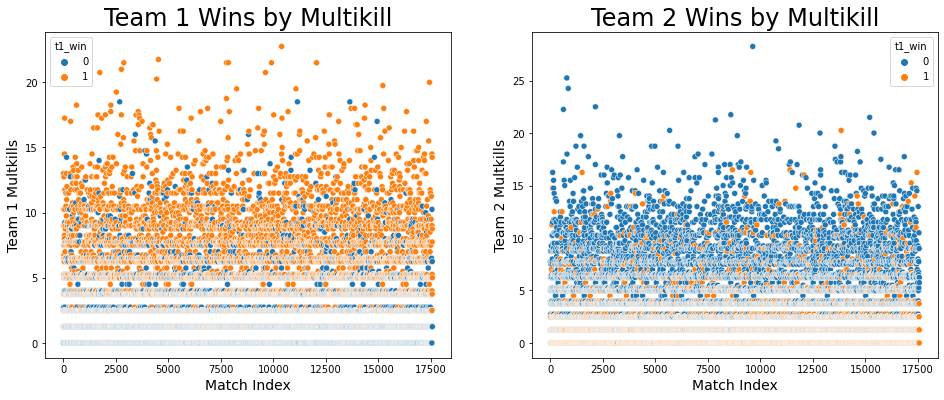

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(16,6), facecolor="w")
sns.scatterplot(data=lol, x=range(0, lol.shape[0]), y="t1_total_weightedMultikills", hue="t1_win",
                ax=ax[0])

ax[0].set_title("Team 1 Wins by Multikill", size=24)
ax[0].set_xlabel("Match Index", size=14)
ax[0].set_ylabel("Team 1 Multkills",size=14);

sns.scatterplot(data=lol, x=range(0, lol.shape[0]), y="t2_total_weightedMultikills", hue="t1_win",
                ax=ax[1])

ax[1].set_title("Team 2 Wins by Multikill", size=24)
ax[1].set_xlabel("Match Index", size=14)
ax[1].set_ylabel("Team 2 Multkills",size=14);

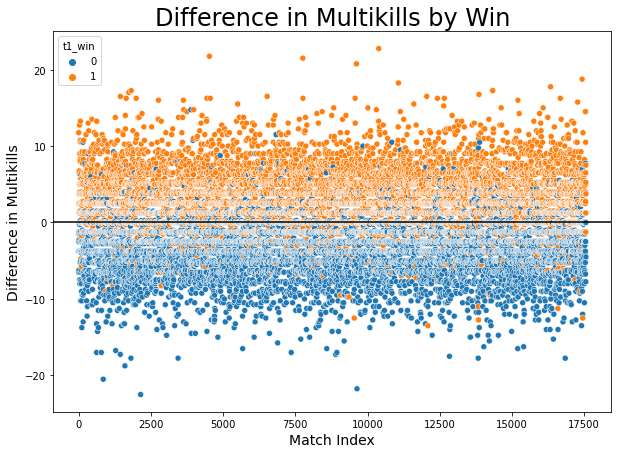

In [26]:
plt.figure(figsize=(10,7), facecolor="w")
sns.scatterplot(data=lol, x=range(0, lol.shape[0]), y="t1-t2_total_weightedMultikills", hue="t1_win")

plt.title("Difference in Multikills by Win", size=24)
plt.axhline(y=0, color="k")
plt.xlabel("Match Index", size=14)
plt.ylabel("Difference in Multikills",size=14);

## Feature Engineering Deep Dive - Concluding Remarks
----
This is the power of feature engineering: 10 very disparate features with no strong correlations to the target were refined into one strongly correlated feature without any loss of explanatory potential within the data.

With 1,150 features in the base DataFrame, Feature Engineering will be critical to reducing the complexity and allow a useful model to be generated. The main danger is that there are a number of features which would cause the target value to leak into the other features.

## Team Scores
----
The following features should be team scores but are actually stored individually in the API.

Most of the other team scores need to be aggregated but for these select few features a single sample is actually the correct team score. We'll use the `t#p1_feature` value to create `t#_feature` and then drop the individual player values in the dataframe.

In [27]:
# map features in features list from idividual to team features
features = ["turretsLost", "nexusLost", "inhibitorsLost", "gameEndedInEarlySurrender",
            "gameEndedInSurrender", "timePlayed"]

for team in range(1,3):
    for feature in features:
        # assign t#_feature to be the t#p1_feature
        lol[f"t{team}_{feature}"] = lol[f"t{team}p1_{feature}"]
        
        # drop all columns with the team and p# for the given feature set
        for prefix in [player for player in PLAYER_PREFIXES if player.startswith(f"t{team}")]:
            lol.drop(columns=[f"{prefix}_{feature}"], inplace=True)

As with the multikills Turrets Lost and Inhibitors Lost will need to be assessed in tandem.

In [28]:
for feature in  ["turretsLost", "inhibitorsLost"]:
    lol[f"t1-t2_{feature}"] = lol[f"t1_{feature}"] - lol[f"t2_{feature}"]

## Team Totals
----
The following features all need to be aggregated into a singular team score.

In [29]:
team_totals_features = ['assists', 'champLevel', 'consumablesPurchased', 'damageDealtToBuildings',
                       'damageDealtToObjectives', 'damageDealtToTurrets', 'damageSelfMitigated',
                       'deaths', 'detectorWardsPlaced', 'goldEarned', 'goldSpent',
                       'itemsPurchased', 'killingSprees', 'kills', 'magicDamageDealt',
                       'magicDamageDealtToChampions', 'magicDamageTaken', 'neutralMinionsKilled',
                       'objectivesStolen', 'objectivesStolenAssists', "bountyLevel",
                       'physicalDamageDealt', 'physicalDamageDealtToChampions', 'physicalDamageTaken',
                       'sightWardsBoughtInGame', 'timeCCingOthers',
                       'totalDamageDealt', 'totalDamageDealtToChampions',
                       'totalDamageShieldedOnTeammates', 'totalDamageTaken', 'totalHeal',
                       'totalHealsOnTeammates', 'totalMinionsKilled', 'totalTimeCCDealt',
                       'totalTimeSpentDead', 'totalUnitsHealed', 'trueDamageDealt',
                       'trueDamageDealtToChampions', 'trueDamageTaken', 'unrealKills', 'visionScore',
                       'visionWardsBoughtInGame', 'wardsKilled', 'wardsPlaced']

```python
for team in range(1,3):
    for feature in TEAM_TOTALS_FEATURES:
        new_feature = f"t{team}_total{feature.capitalize()}"
        lol[new_feature] = lol[[f"{player}_{feature}" for player in PLAYER_PREFIXES
                                      if player.startswith(f"t{team}")]].sum(axis=1)
```
I tried using this instead at first but it was actually far less efficient

In [30]:
# Aggregate individual player features in TEAM_TOTALS_FEATURES to a Team Score
for team in range(1,3):
    for feature in team_totals_features:
        totals = np.zeros(shape=lol.shape[0], dtype=float)
        for player in [player for player in PLAYER_PREFIXES if player.startswith(f"t{team}")]:
            totals += lol[f"{player}_{feature}"]
        lol[f"t{team}_total_{feature}"] = totals

## Combine These Features
----
All of the features in `team_totals_features` needs to be combined and assessed in tandem.

In [31]:
for feature in team_totals_features:
    lol[f"t1-t2_total_{feature}"] = lol[f"t1_total_{feature}"] - lol[f"t2_total_{feature}"]

## Dominance Ratio
----
Historically two metrics that were primary grading metrics of player performance is KD and KDA.

KD (Kills to Deaths) is a key indicator of a player's performance within the game as players that kill more than they die likely performed well in the game. However this metric doesn't account for assists and penalizes players that are in a support role.

Formula = $\frac{Kills}{Deaths}$

In order to account for support roles Riot uses the KDA (Kills and Assists to Deaths) Ratio. The problem with this is that as assists are far more common it can artificially inflate if players die a lot but are in more team fights.

Formula = $\frac{Kills + Assists}{Deaths}$

Thus for this section the Dominance Ratio will be applied. This is a formula that applies a weight to the Kills and Deaths in order to account for support roles while still penalizing those that die a large amount.
*Note: dividing by zero would result in an undefined result so adding 1 death to all players*

Formula = $\frac{2 * Kills + Assists}{3 * Deaths}$

In [32]:
# create a dominance ratio column
for player in PLAYER_PREFIXES:
    lol[f"{player}_dominanceRatio"] = ((2 * lol[f"{player}_kills"] + (lol[f"{player}_assists"]))
                             / (3 * (lol[f"{player}_deaths"] + 1)))

In [33]:
# create an average team dominance ratio column for each team
lol["t1_avgDominanceRatio"] = lol[[f"{player}_dominanceRatio" for player in t1_players]].mean(axis=1)
lol["t2_avgDominanceRatio"] = lol[[f"{player}_dominanceRatio" for player in t2_players]].mean(axis=1)

In [34]:
lol["t1-t2_avgDominanceRatio"] = lol["t1_avgDominanceRatio"] - lol["t2_avgDominanceRatio"]

## Team Features
----
 - Tandem Baron, Champion, Dragon, Inhibitor, and RIft Herald Kills
 - Aggregate total First Flags then assign in Tandem

In [35]:
for feature in TEAM_FEATURES:
    if "kills" in feature:
        lol[f"t1-t2_{feature}"] = lol[f"t1_{feature}"] - lol[f"t2_{feature}"]

### Team Firsts
----
In the game of league of legends snowballing a huge factor. One metric which is well documented is that each of the "firsts" be it a turret, a dragon or a baron are signifigant predictors in the outcome of the game. 

In [36]:
for team in range(1,3):
    features = [f"t{team}_{feature}" for feature in TEAM_FEATURES if "first" in feature]
    lol[f"t{team}_total_firsts"] = lol[features].sum(axis=1)

In [37]:
lol["t1-t2_total_firsts"] = lol[f"t1_total_firsts"] - lol[f"t2_total_firsts"]

In [38]:
lol[["t1-t2_total_firsts"]].corrwith(lol["t1_win"])

t1-t2_total_firsts    0.661831
dtype: float64

### Max Values
----
The following features should not be individualized scores. For the purpose of determining if Team 1 Wins these should be a max between players on both teams. Assign 1 if t1's max is higher than t2's max, otherwise assign 0.
 - `higherkillingSpree`
 - `firstBloodKill`
 - `firstTowerKill`
 
The following features should remain separated by team. Consider later scoring
 - `totalItems`
 - `longestTimeSpentLiving`
 - `avgSummonerLevel`

In [39]:
lol["t1_largerkillingSpree"] = (lol[[f"{player}_largestKillingSpree"
                                     for player in t1_players]].max(axis=1)
                                > lol[[f"{player}_largestKillingSpree"
                                     for player in t2_players]].max(axis=1)).astype(int)

In [40]:
lol["t1_longestTimeSpentLiving"] = lol[[f"{player}_longestTimeSpentLiving" for player
                                        in t1_players]].max(axis=1)

lol["t2_longestTimeSpentLiving"] = lol[[f"{player}_longestTimeSpentLiving" for player
                                        in t2_players]].max(axis=1)

In [41]:
lol["t1-t2_longestTimeSpentLiving"] = lol["t1_longestTimeSpentLiving"] - lol["t2_longestTimeSpentLiving"]

### Sum Values
----
The number of items for each team needs to be quantified.

Initially, the item count was simply aggregated per team. This resulted in a correlation coefficient of 0.281.

By aggregating the tiers to items (basic=1, epic=2, legendary=3, mythic=4) the correlation coefficient was increased to 0.536.

This was the initial code in order to calculate the total item counts per team:
```python
lol["t1_totalItems"] = (lol[[f"{player}_item{item}" for item in range(7)
                             for player in t1_players]] > 0).astype(int).sum(axis=1)
lol["t2_totalItems"] = (lol[[f"{player}_item{item}" for item in range(7)
                             for player in t2_players]] > 0).astype(int).sum(axis=1)
lol["t1-t2_totalItems"] = lol["t1_totalItems"] - lol["t2_totalItems"]
```

In [42]:
def item_value(item_number):
    """Returns the item tier based on item_number"""
    if item_number < 2400:
        return 1
    if item_number < 3050:
        return 2
    if item_number > 6693:
        return 3
    if item_number > 6617:
        return 4
    return 3

In [43]:
for player in PLAYER_PREFIXES:
    for item in range(7):
        lol[f"{player}_itemValue{item}"] = lol[f"{player}_item{item}"].map(item_value)

In [44]:
lol["t1_totalItemsValues"] = lol[[f"{player}_itemValue{item}" for item in range(7)
                             for player in t1_players]].sum(axis=1)
lol["t2_totalItemsValues"] = lol[[f"{player}_itemValue{item}" for item in range(7)
                             for player in t2_players]].sum(axis=1)
lol["t1-t2_totalItemsValues"] = lol["t1_totalItemsValues"] - lol["t2_totalItemsValues"]

In [45]:
lol["t1_total_longestTimeSpentLiving"] = lol[[f"{player}_longestTimeSpentLiving" for player
                                              in t1_players]].sum(axis=1)

lol["t2_total_longestTimeSpentLiving"] = lol[[f"{player}_longestTimeSpentLiving" for player
                                              in t2_players]].sum(axis=1)

In [46]:
lol["t1-t2_total_longestTimeSpentLiving"] = (lol["t1_total_longestTimeSpentLiving"] -
                                             lol["t2_total_longestTimeSpentLiving"])

### Average Values
----

In [47]:
lol["t1_avgSummonerLevel"] = lol[[f"{player}_summonerLevel" for player
                                  in t1_players]].mean(axis=1)
lol["t2_avgSummonerLevel"] = lol[[f"{player}_summonerLevel" for player
                                  in t2_players]].mean(axis=1)
lol["t1-t2_avgSummonerLevel"] = lol["t1_avgSummonerLevel"] - lol["t2_avgSummonerLevel"]

## Same Values?
----
Check if the values are the same between all values of `t1-t2_total_damageDealtToTurrets` and `t1-t2_total_damageDealtToBuildings`

If sum of all negated truth values are 0 they match.

In [48]:
sum(~(lol["t1-t2_total_damageDealtToTurrets"] == lol["t1-t2_total_damageDealtToBuildings"]).values)

0

In [49]:
lol["t1-t2_total_damageDealtToTurrets"]

0       -20192.0
1        -7134.0
2         9035.0
3       -18332.0
4       -37431.0
          ...   
17560     4926.0
17561   -10214.0
17562   -39480.0
17563     6243.0
17564   -19454.0
Name: t1-t2_total_damageDealtToTurrets, Length: 17565, dtype: float64

In [50]:
sum(~(lol["t1-t2_total_damageDealtToTurrets"] == lol["t1-t2_total_damageDealtToObjectives"]).values)

17536

In [51]:
lol.drop(columns=["t1-t2_total_damageDealtToBuildings"], inplace=True)

# Correlation Check
----

In [52]:
lol.corrwith(lol["t1_win"]).sort_values(ascending=False)[1:50]

t1-t2_total_goldEarned                     0.906788
t1-t2_total_champLevel                     0.899393
t1-t2_tower_kills                          0.873594
t1-t2_total_bountyLevel                    0.864129
t1-t2_total_kills                          0.853068
t1-t2_champion_kills                       0.852712
t1-t2_total_damageDealtToTurrets           0.839872
t1-t2_total_damageDealtToObjectives        0.821418
t1-t2_avgDominanceRatio                    0.811133
t1_total_bountyLevel                       0.799222
t1-t2_total_assists                        0.791543
t1_avgDominanceRatio                       0.768064
t1-t2_total_goldSpent                      0.762314
t1-t2_total_killingSprees                  0.760106
t1_tower_kills                             0.756323
t2_turretsLost                             0.756323
t1-t2_total_totalDamageDealt               0.749939
t1-t2_inhibitor_kills                      0.742055
t2_nexusLost                               0.730638
t1-t2_total_

# Save
----
Save Progress

In [53]:
lol.to_csv("./data/matches/processed_match_df.csv", index=False, compression="zip")

## Visualizations
----

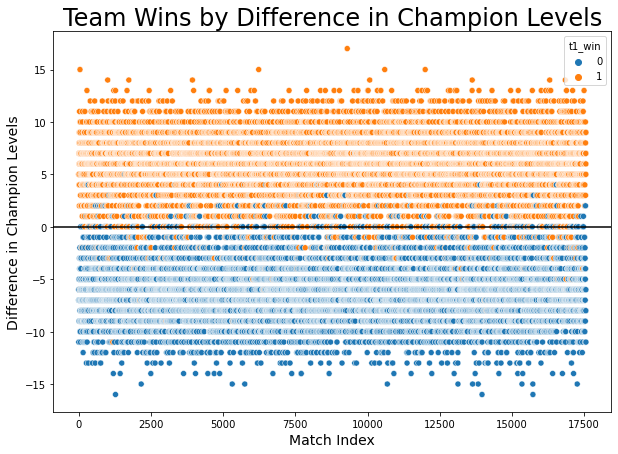

In [54]:
plt.figure(figsize=(10,7), facecolor="w")
sns.scatterplot(data=lol, x=range(0,lol.shape[0]), y="t1-t2_total_champLevel", hue="t1_win")
plt.axhline(y=0, color="k")

plt.title("Team Wins by Difference in Champion Levels", size=24)
plt.xlabel("Match Index", size=14)
plt.ylabel("Difference in Champion Levels",size=14);

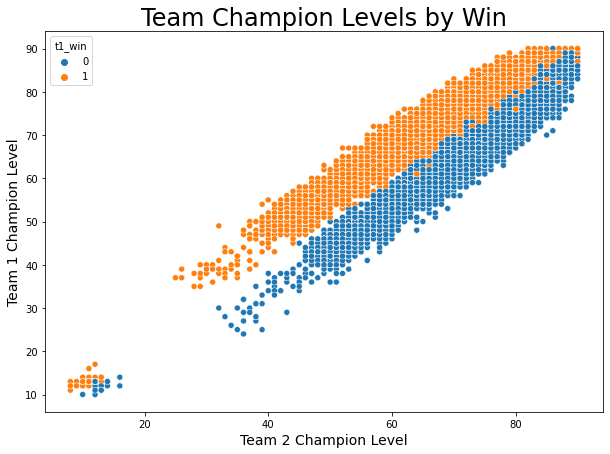

In [55]:
plt.figure(figsize=(10,7), facecolor="w")
sns.scatterplot(data=lol, y="t1_total_champLevel", x="t2_total_champLevel", hue="t1_win")

plt.title("Team Champion Levels by Win", size=24)
plt.xlabel("Team 2 Champion Level", size=14)
plt.ylabel("Team 1 Champion Level",size=14);

# Outlier Group
----

There is an outlier group in the graph above which is likely derived from the game's surrender rules.

 - Teams can not surrender until 20 minutes have elapsed if 4/5 players on a team agree.
 - Teams can surrender early after 15 minutes if the decision is unanimous.
 - Team can surrender early sooner if a player is AFK (does not connect or leaves the game).

The following graph confirms that the group at the bottom represents early surrenders exclusively.

In theory, the lack of data points between levels 20 and 30 would be explained by the 15-minute minimum time before a surrender is possible. However, it is striking that there are no early surrender flags outside of the group at the bottom. This implies the early surrender flag is only from instances where there was an AFK player.

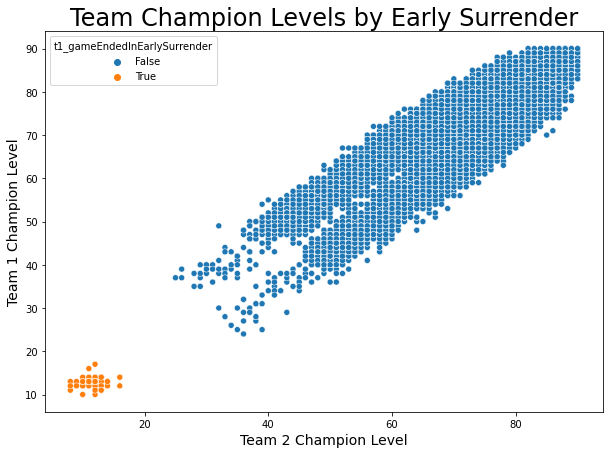

In [56]:
plt.figure(figsize=(10,7), facecolor="w")
sns.scatterplot(data=lol, y="t1_total_champLevel", x="t2_total_champLevel",
                hue="t1_gameEndedInEarlySurrender")

plt.title("Team Champion Levels by Early Surrender", size=24)
plt.xlabel("Team 2 Champion Level", size=14)
plt.ylabel("Team 1 Champion Level",size=14);

### Examining Early Surrenders by Game Length
----
Examining the champion level data grouped by game lengths less than 20 minutes, it is clear that the gap is caused by the 15-minute minimum before players can surrender. Based on this information, it is fair to conclude that despite surrenders in 15-20-minute time frames being classified as an early surrender, the Riot API only classifies games as an early surrender if there was an AFK player.

As such, all of the early surrender games would be irrelevant outliers, and should be dropped from the dataset and modelling process.

In [57]:
lol["gamelengthcomparison"] = ((lol["t2_timePlayed"] / 60) < 20).astype(int)

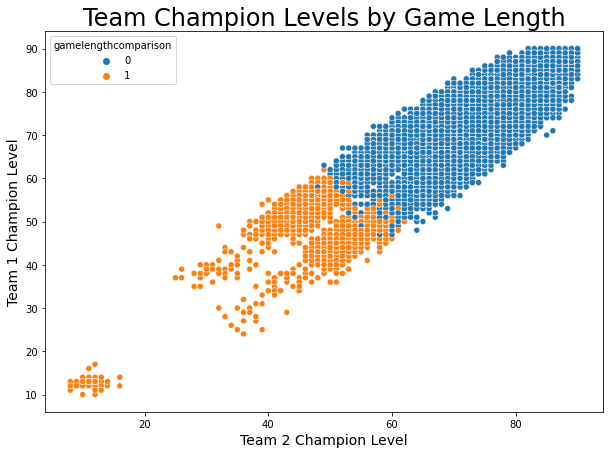

In [58]:
plt.figure(figsize=(10,7), facecolor="w")
sns.scatterplot(data=lol, y="t1_total_champLevel", x="t2_total_champLevel",
                hue="gamelengthcomparison")

plt.title("Team Champion Levels by Game Length", size=24)
plt.xlabel("Team 2 Champion Level", size=14)
plt.ylabel("Team 1 Champion Level",size=14);

## Early Surrenders Distorting Dominance Ratios
----
The early surrenders are also distorting the metrics in Dominance Ratios.

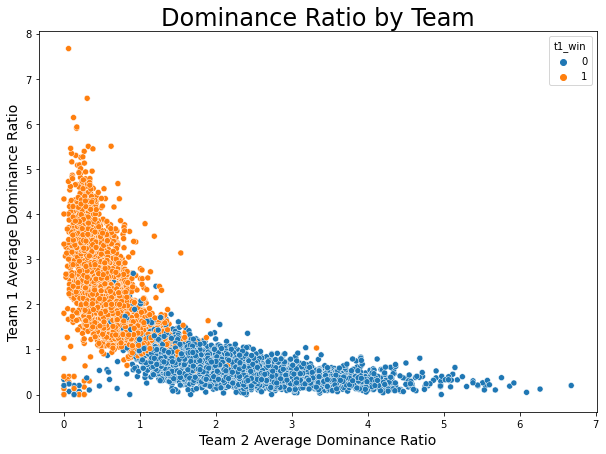

In [59]:
plt.figure(figsize=(10,7), facecolor="w")
sns.scatterplot(data=lol, y="t1_avgDominanceRatio", x="t2_avgDominanceRatio",
                hue="t1_win")

plt.title("Dominance Ratio by Team", size=24)
plt.xlabel("Team 2 Average Dominance Ratio", size=14)
plt.ylabel("Team 1 Average Dominance Ratio",size=14);

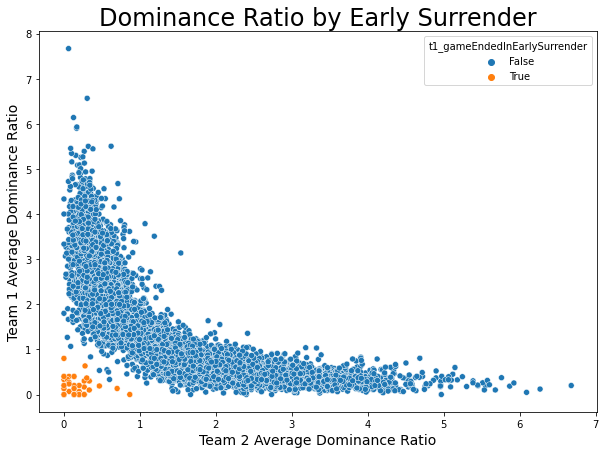

In [60]:
plt.figure(figsize=(10,7), facecolor="w")
sns.scatterplot(data=lol, y="t1_avgDominanceRatio", x="t2_avgDominanceRatio",
                hue="t1_gameEndedInEarlySurrender")

plt.title("Dominance Ratio by Early Surrender", size=24)
plt.xlabel("Team 2 Average Dominance Ratio", size=14)
plt.ylabel("Team 1 Average Dominance Ratio",size=14);

In [61]:
#Remove Early Surrender Matches
lol = lol[lol["t1_gameEndedInEarlySurrender"] == False].copy()

In [62]:
lol.shape

(17493, 1332)

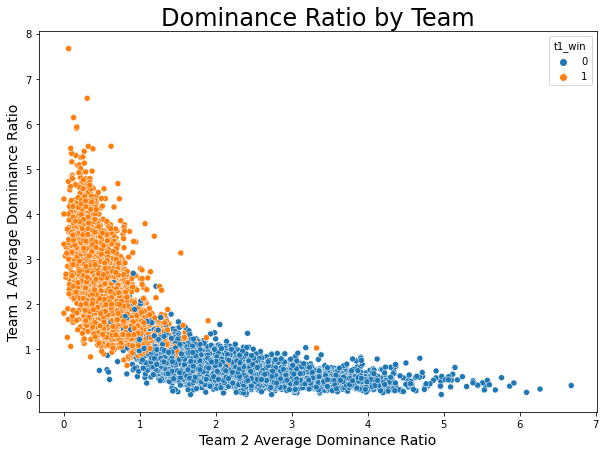

In [63]:
plt.figure(figsize=(10,7), facecolor="w")
sns.scatterplot(data=lol, y="t1_avgDominanceRatio", x="t2_avgDominanceRatio",
                hue="t1_win")

plt.title("Dominance Ratio by Team", size=24)
plt.xlabel("Team 2 Average Dominance Ratio", size=14)
plt.ylabel("Team 1 Average Dominance Ratio",size=14);

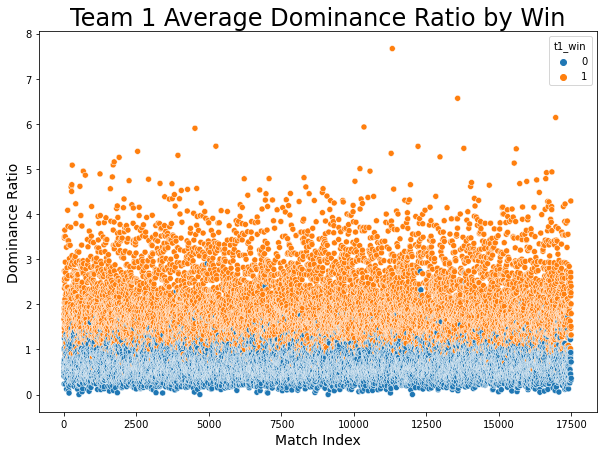

In [64]:
plt.figure(figsize=(10,7), facecolor="w")
sns.scatterplot(data=lol, x=range(0,lol.shape[0]), y="t1_avgDominanceRatio", hue="t1_win")

plt.title("Team 1 Average Dominance Ratio by Win", size=24)
plt.xlabel("Match Index", size=14)
plt.ylabel("Dominance Ratio",size=14);

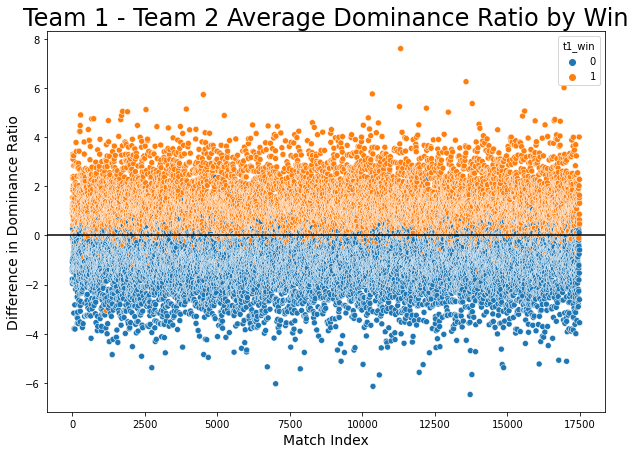

In [65]:
plt.figure(figsize=(10,7), facecolor="w")
sns.scatterplot(data=lol, x=range(0,lol.shape[0]), y="t1-t2_avgDominanceRatio", hue="t1_win")
plt.axhline(y=0, color="k")

plt.title("Team 1 - Team 2 Average Dominance Ratio by Win", size=24)
plt.xlabel("Match Index", size=14)
plt.ylabel("Difference in Dominance Ratio",size=14);

### Total Damage Dealt
----
Total damage dealt shows an interesting issue that arises in longer games. Damage dealt is actually a great predictor until the match lasts long enough for damage on each team to reach over 100K. After 120K it becomes completely unpredicable.

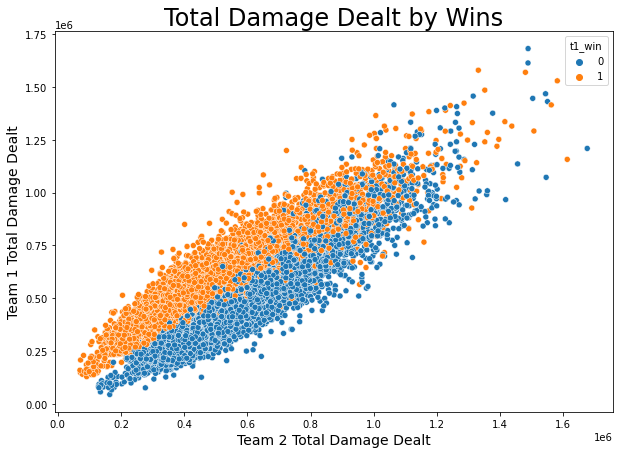

In [66]:
plt.figure(figsize=(10,7), facecolor="w")
sns.scatterplot(data=lol, x="t2_total_totalDamageDealt", y="t1_total_totalDamageDealt",
                hue="t1_win")

plt.title("Total Damage Dealt by Wins", size=24)
plt.xlabel("Team 2 Total Damage Dealt", size=14)
plt.ylabel("Team 1 Total Damage Dealt",size=14);

As damage increases the longer the game runs we can determine a good time frame to filter to and determine if any adjustments are needed. The 40 minute mark appears to capture the bulk of the noise.

In [67]:
lol["gamelengthcomparison"] = ((lol["t2_timePlayed"] / 60) > 40).astype(int)

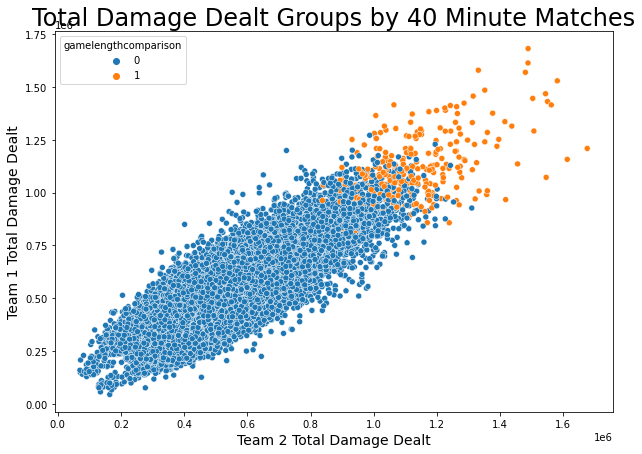

In [68]:
plt.figure(figsize=(10,7), facecolor="w")
sns.scatterplot(data=lol, x="t2_total_totalDamageDealt", y="t1_total_totalDamageDealt",
                hue="gamelengthcomparison")

plt.title("Total Damage Dealt Groups by 40 Minute Matches", size=24)
plt.xlabel("Team 2 Total Damage Dealt", size=14)
plt.ylabel("Team 1 Total Damage Dealt",size=14);

League of legends limits players to Champion Levels of 18, 6 items and 1 buff potion per player. This means that after games run long enough the lead advantage that readily predicts the outcome in the early and standard length game wanes, and games shift to being determined by each team's level of cooperation, strategy and general positioning.

In order to make a better model with less noise we have a few options.
 1. Drop all games over 40 minutes. This is the worst option.
 2. Set all predictive metrics in games over 40 minutes to the mean.
 3. Adjust the datapoints to be a polynomial feature with a better predictor of late game success
 
Next step: some quick EDA for games over 40 minutes.

In [69]:
#Make a copy of the league of legends DataFrame limited to matches over 40 minutes
lol["gamelengthcomparison"] = ((lol["t2_timePlayed"] / 60) > 40).astype(int)
longergames = lol[lol["gamelengthcomparison"] == 1].copy()

The correlations are completely different from the original EDA.

As implied earlier metrics like gold and champion levels fall off in favor of more skill based features such as bounty level or objective based features like tower kills, dragon and baron inhibitor kills.

In [70]:
longergames.corrwith(longergames["t1_win"]).sort_values(ascending=False)[1:25]

t2_nexusLost                           0.946400
t1-t2_total_bountyLevel                0.748674
t1-t2_total_goldEarned                 0.745623
t1_total_bountyLevel                   0.711680
t1-t2_tower_kills                      0.669737
t1-t2_total_damageDealtToTurrets       0.599745
t1-t2_total_damageDealtToObjectives    0.599574
t1-t2_total_champLevel                 0.578218
t1_tower_kills                         0.570873
t2_turretsLost                         0.570873
t1p4_bountyLevel                       0.545134
t1_total_damageDealtToObjectives       0.533638
t1-t2_total_kills                      0.510808
t1-t2_champion_kills                   0.508780
t1_total_damageDealtToTurrets          0.503554
t1_total_damageDealtToBuildings        0.503554
t1-t2_avgDominanceRatio                0.485866
t1-t2_inhibitor_kills                  0.445710
t1-t2_dragon_kills                     0.430997
t1p4_nexusKills                        0.430421
t1_avgDominanceRatio                   0

In [71]:
longergames[["t1-t2_total_totalDamageDealt"]].corrwith(longergames["t1_win"])

t1-t2_total_totalDamageDealt    0.313768
dtype: float64

### Difference in Total Damage vs Difference in Bounty Levels by Win
----
The  following graphs depict how the correlations in these features are completely different. A clear classification grouping can be seen in the `t1-t2_total_bountyLevel` feature but not in the `t1-t2_total_totalDamageDealt` feature.

Due to the way the data is orientated around 0 it is quite simple to coax the data into the the format we need by multiplying <i>absolute value</i> of <i>Damage Dealt</i> and <i>Bounty Levels</i> by the <i>reciprocal</i> of <i>Bounty Levels</i>.

<center> $x = \frac{|DamageDealt * BountyLevels|}{BountyLevels}$ </center>

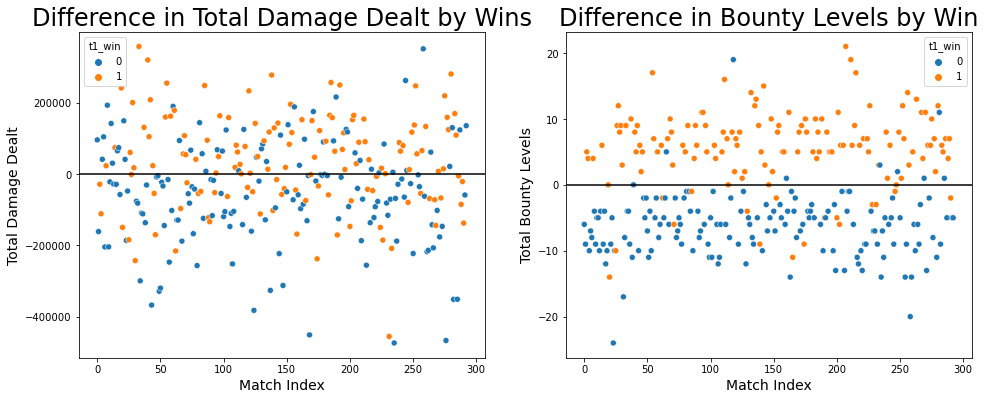

In [72]:
fig, ax = plt.subplots(1, 2, figsize=(16,6), facecolor="w")
sns.scatterplot(data=longergames,
                x=range(0, longergames.shape[0]),
                y="t1-t2_total_totalDamageDealt",
                hue="t1_win",
                ax=ax[0])
ax[0].axhline(y=0, color="k")

ax[0].set_title("Difference in Total Damage Dealt by Wins", size=24)
ax[0].set_xlabel("Match Index", size=14)
ax[0].set_ylabel("Total Damage Dealt",size=14);

sns.scatterplot(data=longergames,
                x=range(0, longergames.shape[0]),
                y="t1-t2_total_bountyLevel",
                hue="t1_win",
                ax=ax[1])
ax[1].axhline(y=0, color="k")

ax[1].set_title("Difference in Bounty Levels by Win", size=24)
ax[1].set_xlabel("Match Index", size=14)
ax[1].set_ylabel("Total Bounty Levels",size=14);

Apply $x = \frac{|DamageDealt * BountyLevels|}{BountyLevels}$ to a new feature as proof of concept.

In [73]:
# generally these variables shouldn't be created but it does make things clearer
damagedealt = longergames["t1-t2_total_totalDamageDealt"]
bountylevels = longergames["t1-t2_total_bountyLevel"]

longergames["t1-t2_total_totalDamageDealt_mod"] =  ((damagedealt.abs() * bountylevels.abs())
                                                     / bountylevels)

# delete these out of memory. They are not needed.
del(damagedealt)
del(bountylevels)

By applying the adjustment there is a clear improvement of the linearity of the late game classifications as shown by the following visualizations

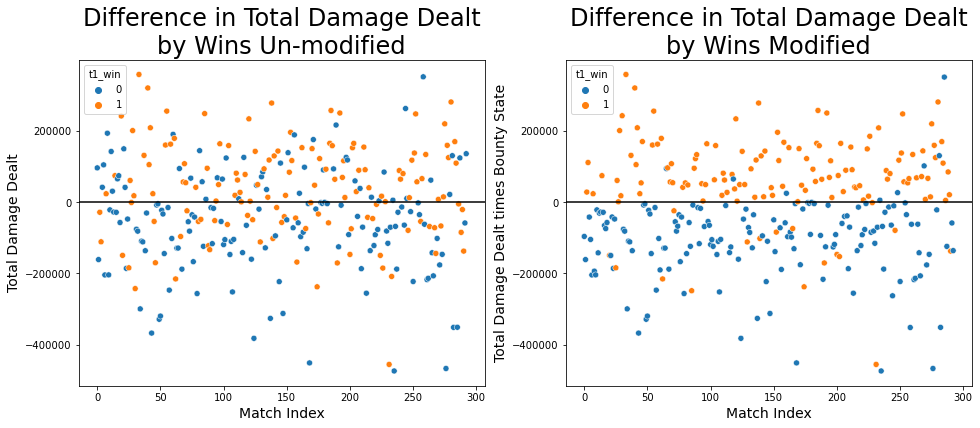

In [74]:
fig, ax = plt.subplots(1, 2, figsize=(16,6), facecolor="w")
sns.scatterplot(data=longergames,
                x=range(0, longergames.shape[0]),
                y="t1-t2_total_totalDamageDealt",
                hue="t1_win",
                ax=ax[0])
ax[0].axhline(y=0, color="k")

ax[0].set_title("Difference in Total Damage Dealt\nby Wins Un-modified", size=24)
ax[0].set_xlabel("Match Index", size=14)
ax[0].set_ylabel("Total Damage Dealt",size=14);

sns.scatterplot(data=longergames,
                x=range(0, longergames.shape[0]),
                y="t1-t2_total_totalDamageDealt_mod",
                hue="t1_win",
                ax=ax[1])
ax[1].axhline(y=0, color="k")

ax[1].set_title("Difference in Total Damage Dealt\nby Wins Modified", size=24)
ax[1].set_xlabel("Match Index", size=14)
ax[1].set_ylabel("Total Damage Dealt times Bounty State",size=14);

### Additional Longer Games EDA
----
While it is clear that this works on damage dealt it might not be as beneficial in additional features. The following visualizations show that Turrets Lost and Inhibitors Losts are still fairly linearly classified. Meanwhile the Different in Damage to Champions as well as the Heals on Teammates both show a signifigant divergence.

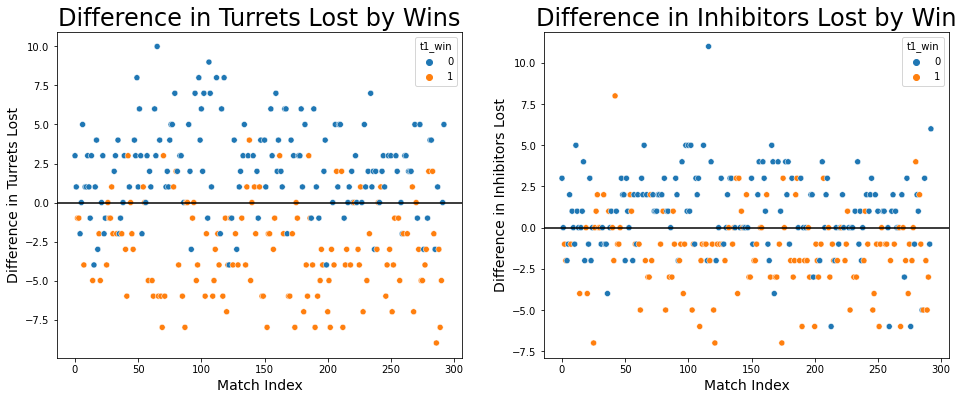

In [75]:
fig, ax = plt.subplots(1, 2, figsize=(16,6), facecolor="w")
sns.scatterplot(data=longergames,
                x=range(0, longergames.shape[0]),
                y="t1-t2_turretsLost",
                hue="t1_win",
                ax=ax[0])
ax[0].axhline(y=0, color="k")

ax[0].set_title("Difference in Turrets Lost by Wins", size=24)
ax[0].set_xlabel("Match Index", size=14)
ax[0].set_ylabel("Difference in Turrets Lost",size=14);

sns.scatterplot(data=longergames,
                x=range(0, longergames.shape[0]),
                y="t1-t2_inhibitorsLost",
                hue="t1_win",
                ax=ax[1])
ax[1].axhline(y=0, color="k")

ax[1].set_title("Difference in Inhibitors Lost by Win", size=24)
ax[1].set_xlabel("Match Index", size=14)
ax[1].set_ylabel("Difference in Inhibitors Lost",size=14);

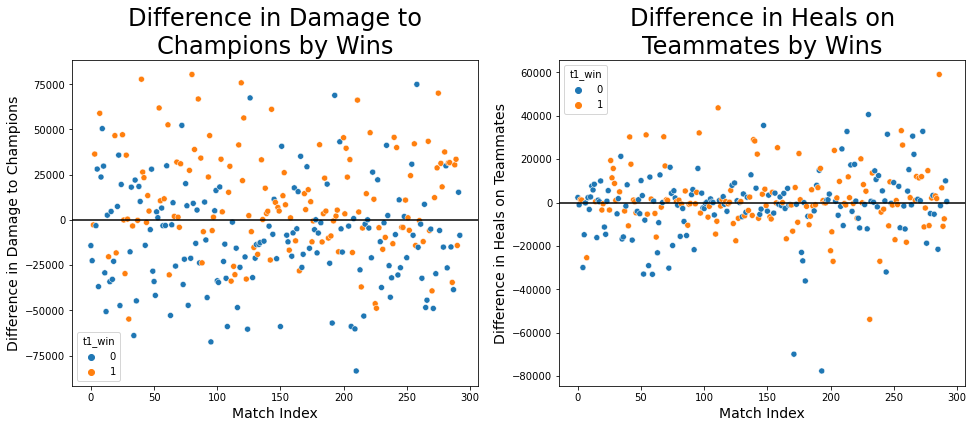

In [76]:
fig, ax = plt.subplots(1, 2, figsize=(16,6), facecolor="w")
sns.scatterplot(data=longergames,
                x=range(0, longergames.shape[0]),
                y="t1-t2_total_totalDamageDealtToChampions",
                hue="t1_win",
                ax=ax[0])
ax[0].axhline(y=0, color="k")

ax[0].set_title("Difference in Damage to\nChampions by Wins", size=24)
ax[0].set_xlabel("Match Index", size=14)
ax[0].set_ylabel("Difference in Damage to Champions",size=14);

sns.scatterplot(data=longergames,
                x=range(0, longergames.shape[0]),
                y="t1-t2_total_totalHealsOnTeammates",
                hue="t1_win",
                ax=ax[1])
ax[1].axhline(y=0, color="k")

ax[1].set_title("Difference in Heals on\nTeammates by Wins", size=24)
ax[1].set_xlabel("Match Index", size=14)
ax[1].set_ylabel("Difference in Heals on Teammates",size=14);

### Change all features with damage and healing
----
The following steps will generate a list of viariables to change and then test to see if the same improvement was seen as noted by Total Damage Dealt.

In [77]:
# generate a list of columns to adjust based on Bounty Levels
to_change = [col for col in longergames.columns if col.startswith("t1-t2")]

In [78]:
# filter the list to only include damage dealing metrics and healing columns 
to_change = [col for col in to_change
             if ("damage" in col.lower()) or ("heal" in col.lower())]

# remove duplicate
to_change.remove("t1-t2_total_totalDamageDealt_mod")

In [79]:
bountylevels = longergames["t1-t2_total_bountyLevel"]
for col in to_change:
    longergames[f"{col}_mod"] = (longergames[col].abs() *  bountylevels.abs()
                                 / bountylevels)
# this is the last time we'll need this for real
del(bountylevels)

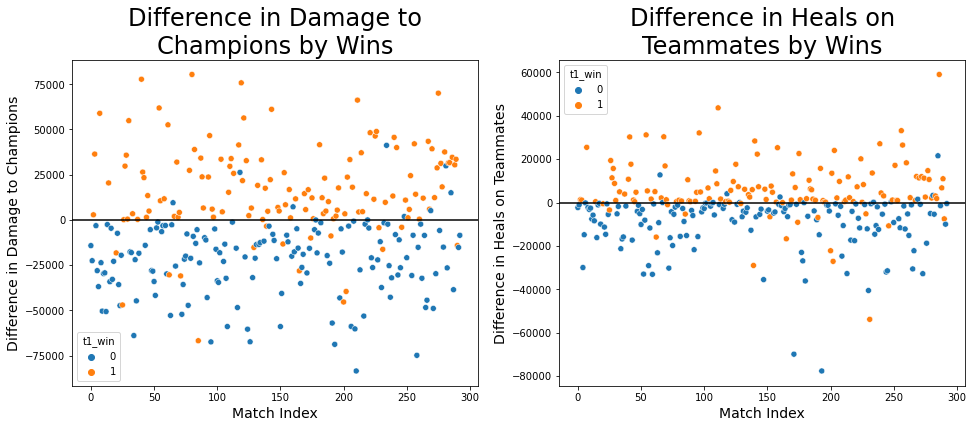

In [80]:
fig, ax = plt.subplots(1, 2, figsize=(16,6), facecolor="w")
sns.scatterplot(data=longergames,
                x=range(0, longergames.shape[0]),
                y="t1-t2_total_totalDamageDealtToChampions_mod",
                hue="t1_win",
                ax=ax[0])
ax[0].axhline(y=0, color="k")

ax[0].set_title("Difference in Damage to\nChampions by Wins", size=24)
ax[0].set_xlabel("Match Index", size=14)
ax[0].set_ylabel("Difference in Damage to Champions",size=14);

sns.scatterplot(data=longergames,
                x=range(0, longergames.shape[0]),
                y="t1-t2_total_totalHealsOnTeammates_mod",
                hue="t1_win",
                ax=ax[1])
ax[1].axhline(y=0, color="k")

ax[1].set_title("Difference in Heals on\nTeammates by Wins", size=24)
ax[1].set_xlabel("Match Index", size=14)
ax[1].set_ylabel("Difference in Heals on Teammates",size=14);

### Interpretation
----
Looking at the above graphs it is clear the hypthesis proved true for Total Damage to Champions but the results are less clear to Heals on Teammates. However the following cell reports there are at double the amount of accurate classications for the modelling process after modifying `t1-t2_total_totalHealsOnTeammates`

In [81]:
print("There are",
      longergames[(longergames["t1-t2_total_totalHealsOnTeammates"] > 1)
                  & (longergames["t1_win"] == 1)].shape[0],
      "accurate Team 1 winning records results in the original dataset \nand",
      longergames[(longergames["t1-t2_total_totalHealsOnTeammates_mod"] > 1)
                  & (longergames["t1_win"] == 1)].shape[0],
      "accurate Team 1 winning records in the modified dataset")
print("\nThere are",
      longergames[(longergames["t1-t2_total_totalHealsOnTeammates"] < 1)
                  & (longergames["t1_win"] == 0)].shape[0],
      "accurate Team 1 losing records results in the original dataset \nand",
      longergames[(longergames["t1-t2_total_totalHealsOnTeammates_mod"] < 1)
                  & (longergames["t1_win"] == 0)].shape[0],
      "accurate Team 1 losing records in the modified dataset")

There are 69 accurate Team 1 winning records results in the original dataset 
and 115 accurate Team 1 winning records in the modified dataset

There are 78 accurate Team 1 losing records results in the original dataset 
and 147 accurate Team 1 losing records in the modified dataset


Double check all features improved by checking if there are more Team 1 wins above 0 or more Team 2 wins below zero in any of the features in `to_change`

In [82]:
for col in to_change:
    standard_win = longergames[(longergames[col] > 1)
                               & (longergames["t1_win"] == 1)].shape[0]
    mod_win = longergames[(longergames[f"{col}_mod"] > 1)
                          & (longergames["t1_win"] == 1)].shape[0]
    standard_loss = longergames[(longergames[col] < 1)
                               & (longergames["t1_win"] == 0)].shape[0]
    mod_loss = longergames[(longergames[f"{col}_mod"] < 1)
                          & (longergames["t1_win"] == 0)].shape[0]
    
    if (standard_win > mod_win) or (standard_loss > mod_loss):
        print(f"Feature {col} did not improve after modification")
else:
    print("All features improved")

#cleanup
del(standard_win)
del(mod_win)
del(standard_loss)
del(mod_loss)

All features improved


## Back to the DataFrame lol
----
Now that the hypothesis has been accepted this needs to be applied to the main DataFrame
A lambda function would work but the np.where makes this process a little easier to read.

In [83]:
# ensure gamelengthcomparison is still over 40 minutes
lol["gamelengthcomparison"] = ((lol["t2_timePlayed"] / 60) > 40).astype(int)

for col in to_change:
    #where game length comparison is 1, apply function, else column
    lol[f"{col}_mod"] = np.where(lol["gamelengthcomparison"] == 1,
                                 (lol[col].abs() *  lol["t1-t2_total_bountyLevel"].abs()
                                                           / lol["t1-t2_total_bountyLevel"]),
                                lol[col])

#### Dividing by 0
----
There are actually some nulls created by bounty level being 0. These need to be adjusted to zero.

In [84]:
desired_features = [feature for feature in lol.columns if "mod" in feature]

In [85]:
lol[desired_features].isnull().sum()

game_mode                                         0
t1-t2_total_damageDealtToObjectives_mod           5
t1-t2_total_damageDealtToTurrets_mod              5
t1-t2_total_damageSelfMitigated_mod               5
t1-t2_total_magicDamageDealt_mod                  5
t1-t2_total_magicDamageDealtToChampions_mod       5
t1-t2_total_magicDamageTaken_mod                  5
t1-t2_total_physicalDamageDealt_mod               5
t1-t2_total_physicalDamageDealtToChampions_mod    5
t1-t2_total_physicalDamageTaken_mod               5
t1-t2_total_totalDamageDealt_mod                  5
t1-t2_total_totalDamageDealtToChampions_mod       5
t1-t2_total_totalDamageShieldedOnTeammates_mod    5
t1-t2_total_totalDamageTaken_mod                  5
t1-t2_total_totalHeal_mod                         5
t1-t2_total_totalHealsOnTeammates_mod             5
t1-t2_total_totalUnitsHealed_mod                  5
t1-t2_total_trueDamageDealt_mod                   5
t1-t2_total_trueDamageDealtToChampions_mod        5
t1-t2_total_

In [86]:
for feature in desired_features:
    lol[feature].fillna(0, inplace=True)

In [87]:
lol[desired_features].isnull().sum()

game_mode                                         0
t1-t2_total_damageDealtToObjectives_mod           0
t1-t2_total_damageDealtToTurrets_mod              0
t1-t2_total_damageSelfMitigated_mod               0
t1-t2_total_magicDamageDealt_mod                  0
t1-t2_total_magicDamageDealtToChampions_mod       0
t1-t2_total_magicDamageTaken_mod                  0
t1-t2_total_physicalDamageDealt_mod               0
t1-t2_total_physicalDamageDealtToChampions_mod    0
t1-t2_total_physicalDamageTaken_mod               0
t1-t2_total_totalDamageDealt_mod                  0
t1-t2_total_totalDamageDealtToChampions_mod       0
t1-t2_total_totalDamageShieldedOnTeammates_mod    0
t1-t2_total_totalDamageTaken_mod                  0
t1-t2_total_totalHeal_mod                         0
t1-t2_total_totalHealsOnTeammates_mod             0
t1-t2_total_totalUnitsHealed_mod                  0
t1-t2_total_trueDamageDealt_mod                   0
t1-t2_total_trueDamageDealtToChampions_mod        0
t1-t2_total_

## Verify
----
The followin is a quick visualization to ensure the mapping worked as intended

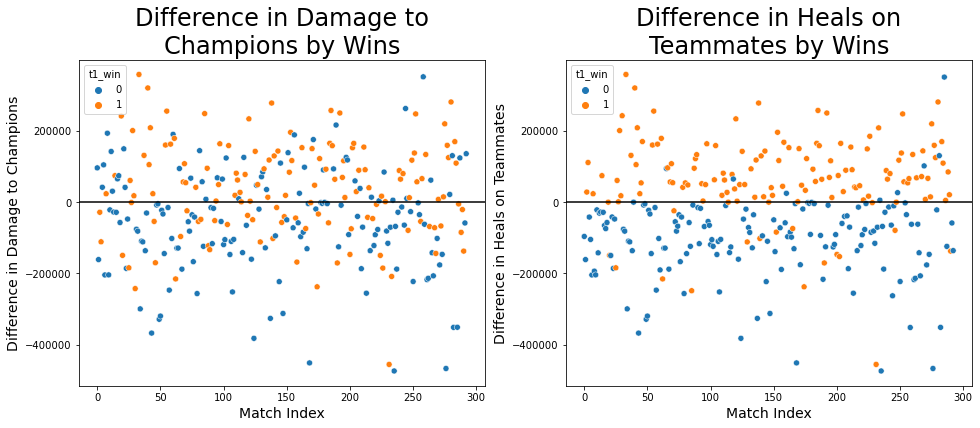

In [88]:
fig, ax = plt.subplots(1, 2, figsize=(16,6), facecolor="w")
sns.scatterplot(data=lol[lol["gamelengthcomparison"] == 1],
                x=range(0, lol[lol["gamelengthcomparison"] == 1].shape[0]),
                y="t1-t2_total_totalDamageDealt",
                hue="t1_win",
                ax=ax[0])
ax[0].axhline(y=0, color="k")

ax[0].set_title("Difference in Damage to\nChampions by Wins", size=24)
ax[0].set_xlabel("Match Index", size=14)
ax[0].set_ylabel("Difference in Damage to Champions",size=14);

sns.scatterplot(data=lol[lol["gamelengthcomparison"] == 1],
                x=range(0, lol[lol["gamelengthcomparison"] == 1].shape[0]),
                y="t1-t2_total_totalDamageDealt_mod",
                hue="t1_win",
                ax=ax[1])
ax[1].axhline(y=0, color="k")

ax[1].set_title("Difference in Heals on\nTeammates by Wins", size=24)
ax[1].set_xlabel("Match Index", size=14)
ax[1].set_ylabel("Difference in Heals on Teammates",size=14);

## Turrets Lost
----
The following visualizations show the effect of turrents being lost for each team. This graph is using a plot graph to show a different way of visualizing which is equally compelling.

As Team 1 loses more turrets the chances of team 1 winning decreases.

As Team 2 loses more turrets Team 1's chances of winning increases.

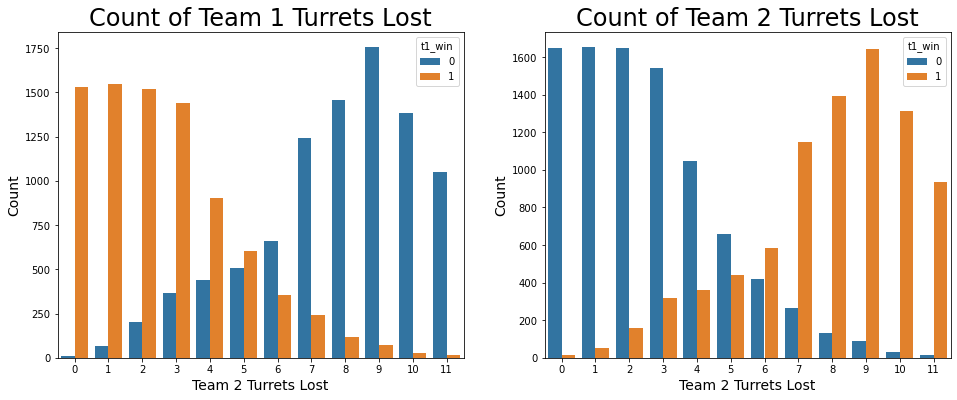

In [89]:
fig, ax = plt.subplots(1, 2, figsize=(16,6), facecolor="w")
sns.countplot(data=lol, x="t1_turretsLost", hue="t1_win", ax=ax[0])

ax[0].set_title("Count of Team 1 Turrets Lost", size=24)
ax[0].set_xlabel("Team 2 Turrets Lost", size=14)
ax[0].set_ylabel("Count",size=14);

sns.countplot(data=lol, x="t2_turretsLost", hue="t1_win", ax=ax[1])

ax[1].set_title("Count of Team 2 Turrets Lost", size=24)
ax[1].set_xlabel("Team 2 Turrets Lost", size=14)
ax[1].set_ylabel("Count",size=14);

## Differencing
----
By differencing Team 1's turrets lost by Team 2's turrets the classification becomes clearer in the dataset. There is some overlap between -4 and 5 with a peak at 0 difference but even at a -1 and 1 the predictive power of turrets lost is extremely strong.

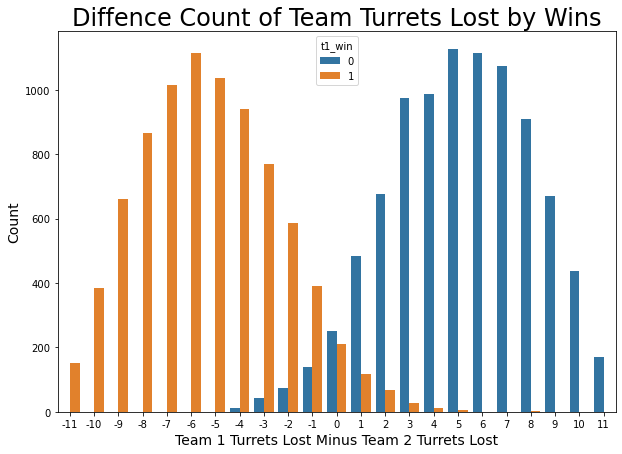

In [90]:
plt.figure(figsize=(10,7), facecolor="w")
sns.countplot(data=lol, x="t1-t2_turretsLost", hue="t1_win")

plt.title("Diffence Count of Team Turrets Lost by Wins", size=24)
plt.xlabel("Team 1 Turrets Lost Minus Team 2 Turrets Lost", size=14)
plt.ylabel("Count",size=14);

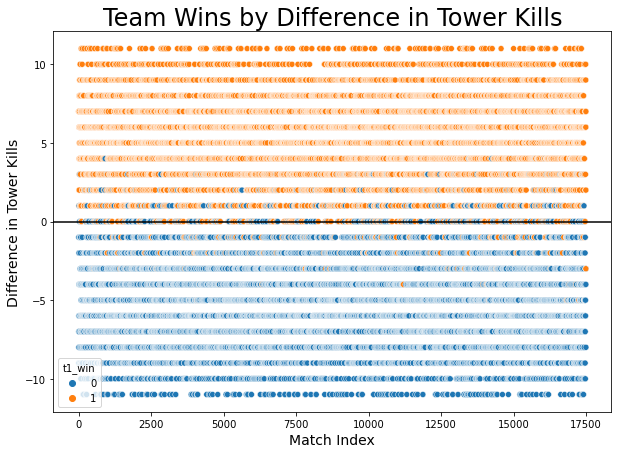

In [91]:
plt.figure(figsize=(10,7), facecolor="w")
sns.scatterplot(data=lol, x=range(0,lol.shape[0]), y="t1-t2_tower_kills", hue="t1_win")
plt.axhline(y=0, color="k")

plt.title("Team Wins by Difference in Tower Kills", size=24)
plt.xlabel("Match Index", size=14)
plt.ylabel("Difference in Tower Kills",size=14);

## Team Firsts
----
Team firsts is not as clear a delineation as turrets lost but the trend is basically the same. The difference in visuals is that the counts are more evenly spread between all values.

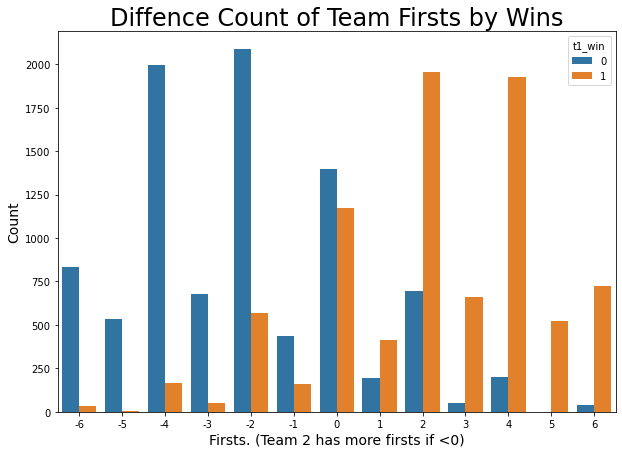

In [92]:
plt.figure(figsize=(10,7), facecolor="w")
sns.countplot(data=lol, x="t1-t2_total_firsts", hue="t1_win")

plt.title("Diffence Count of Team Firsts by Wins", size=24)
plt.xlabel("Firsts. (Team 2 has more firsts if <0)", size=14)
plt.ylabel("Count",size=14);

The trend is easier to see in a scatterplot.

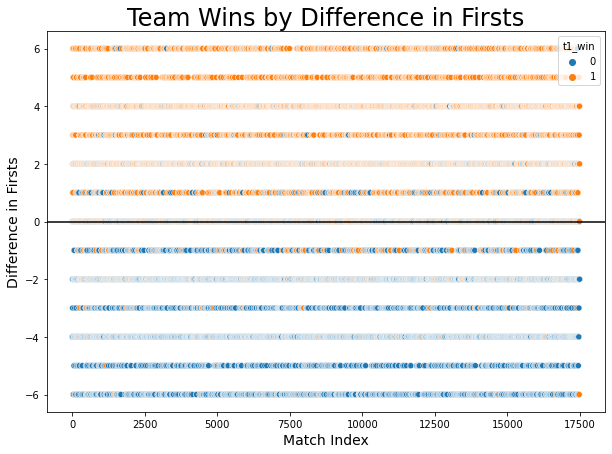

In [93]:
plt.figure(figsize=(10,7), facecolor="w")
sns.scatterplot(data=lol, x=range(0,lol.shape[0]), y="t1-t2_total_firsts", hue="t1_win")
plt.axhline(y=0, color="k")

plt.title("Team Wins by Difference in Firsts", size=24)
plt.xlabel("Match Index", size=14)
plt.ylabel("Difference in Firsts",size=14);

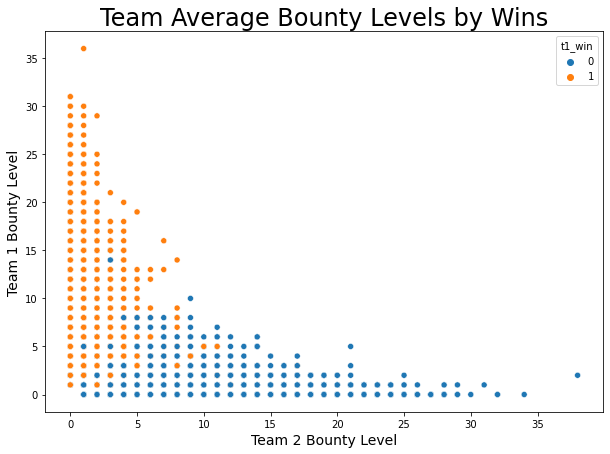

In [94]:
plt.figure(figsize=(10,7), facecolor="w")
sns.scatterplot(data=lol, x="t2_total_bountyLevel", y="t1_total_bountyLevel",
                hue="t1_win")

plt.title("Team Average Bounty Levels by Wins", size=24)
plt.xlabel("Team 2 Bounty Level", size=14)
plt.ylabel("Team 1 Bounty Level",size=14);

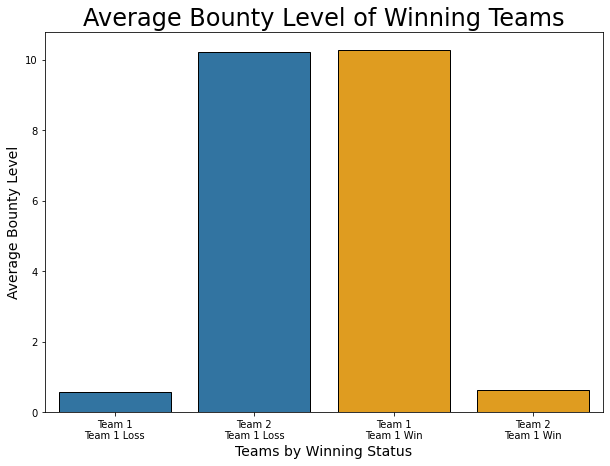

In [95]:
plt.figure(figsize=(10,7), facecolor="w")
sns.barplot(x=["Team 1\nTeam 1 Loss", "Team 2\nTeam 1 Loss",
               "Team 1\nTeam 1 Win", "Team 2\nTeam 1 Win"],
            y=[lol[lol["t1_win"] == 0]["t1_total_bountyLevel"].mean(),
               lol[lol["t1_win"] == 0]["t2_total_bountyLevel"].mean(),
               lol[lol["t1_win"] == 1]["t1_total_bountyLevel"].mean(),
               lol[lol["t1_win"] == 1]["t2_total_bountyLevel"].mean()],
            palette=["#1f77b4", "#1f77b4", "orange", "orange"],
            edgecolor="k")

plt.title("Average Bounty Level of Winning Teams", size=24)
plt.xlabel("Teams by Winning Status", size=14)
plt.ylabel("Average Bounty Level",size=14);

### Average Summoner Level
----
Average Summoner Level is about as arbitrary as possible and has no relevance on which team will win.

Drop from modelling.

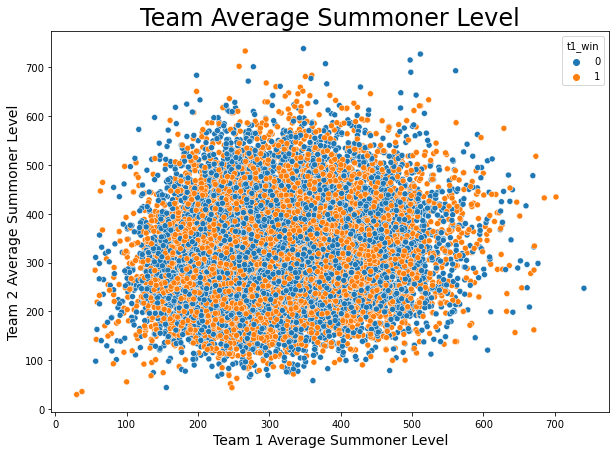

In [96]:
plt.figure(figsize=(10,7), facecolor="w")
sns.scatterplot(data=lol, y="t1_avgSummonerLevel", x="t2_avgSummonerLevel",
                hue="t1_win")

plt.title("Team Average Summoner Level", size=24)
plt.xlabel("Team 1 Average Summoner Level", size=14)
plt.ylabel("Team 2 Average Summoner Level",size=14);

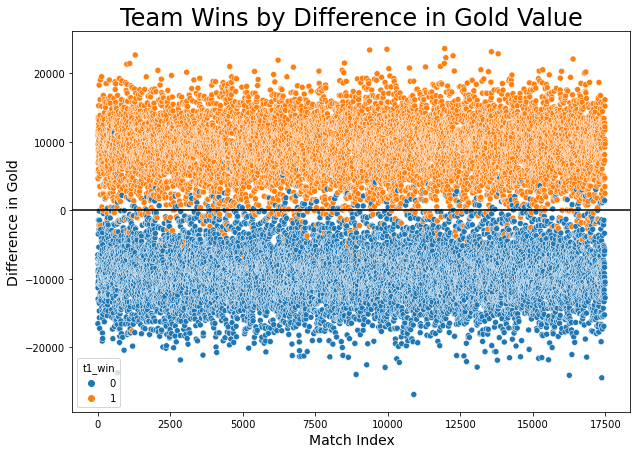

In [97]:
plt.figure(figsize=(10,7), facecolor="w")
sns.scatterplot(data=lol, x=range(0,lol.shape[0]), y="t1-t2_total_goldEarned", hue="t1_win")
plt.axhline(y=0, color="k")

plt.title("Team Wins by Difference in Gold Value", size=24)
plt.xlabel("Match Index", size=14)
plt.ylabel("Difference in Gold",size=14);

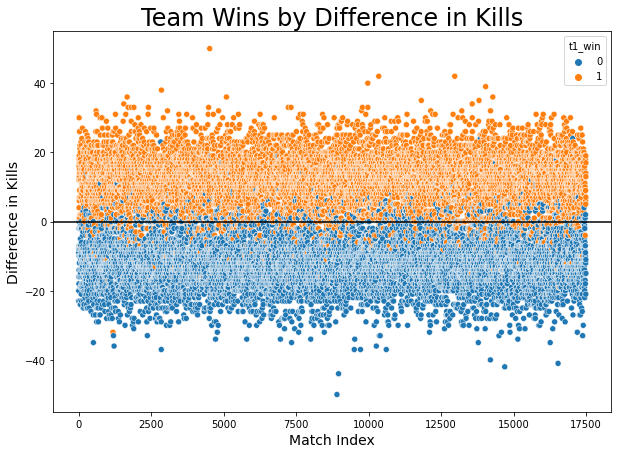

In [98]:
plt.figure(figsize=(10,7), facecolor="w")
sns.scatterplot(data=lol, x=range(0,lol.shape[0]), y="t1-t2_champion_kills", hue="t1_win")
plt.axhline(y=0, color="k")

plt.title("Team Wins by Difference in Kills", size=24)
plt.xlabel("Match Index", size=14)
plt.ylabel("Difference in Kills",size=14);

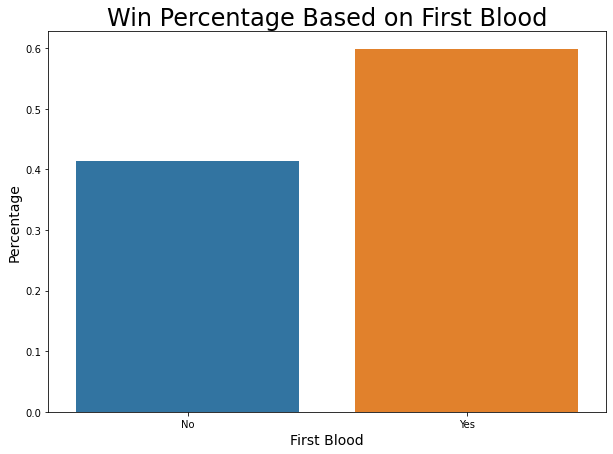

In [99]:
plt.figure(figsize=(10,7), facecolor="w")
sns.barplot(x=["No", "Yes"],
            y=[lol[lol["t1_win"] == 0]["t1_champion_first"].mean(),
               lol[lol["t1_win"] == 1]["t1_champion_first"].mean()])

plt.title("Win Percentage Based on First Blood", size=24)
plt.xlabel("First Blood", size=14)
plt.ylabel("Percentage",size=14);

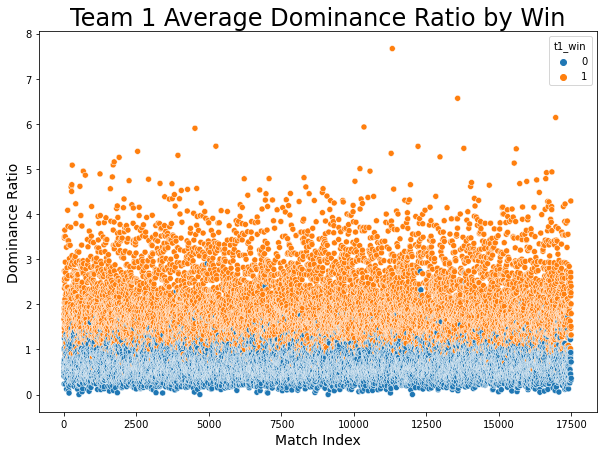

In [100]:
plt.figure(figsize=(10,7), facecolor="w")
sns.scatterplot(data=lol, x=range(0,lol.shape[0]), y="t1_avgDominanceRatio", hue="t1_win")

plt.title("Team 1 Average Dominance Ratio by Win", size=24)
plt.xlabel("Match Index", size=14)
plt.ylabel("Dominance Ratio",size=14);

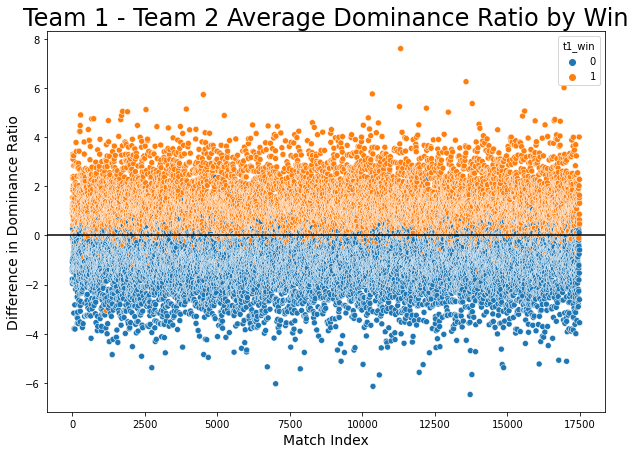

In [101]:
plt.figure(figsize=(10,7), facecolor="w")
sns.scatterplot(data=lol, x=range(0,lol.shape[0]), y="t1-t2_avgDominanceRatio", hue="t1_win")
plt.axhline(y=0, color="k")

plt.title("Team 1 - Team 2 Average Dominance Ratio by Win", size=24)
plt.xlabel("Match Index", size=14)
plt.ylabel("Difference in Dominance Ratio",size=14);

# Save Progress
----

In [102]:
lol.to_csv("./data/matches/processed_match_df.csv", index=False, compression="zip")